## Agglomerative Hierarchical Clustering

### Different Linkage Methods

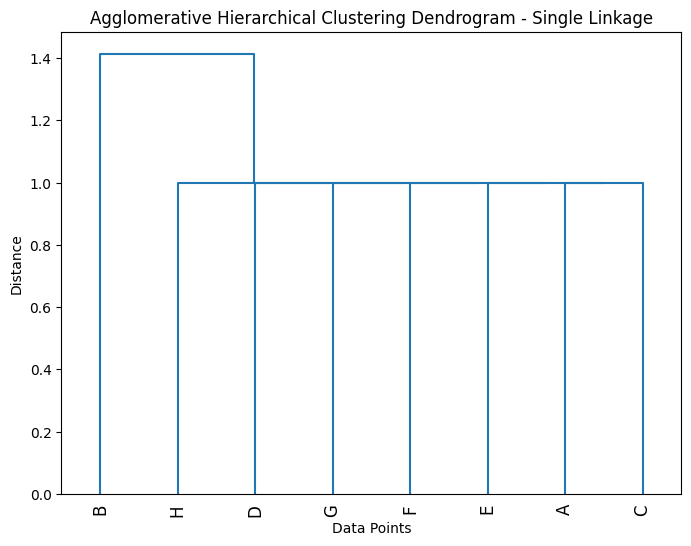

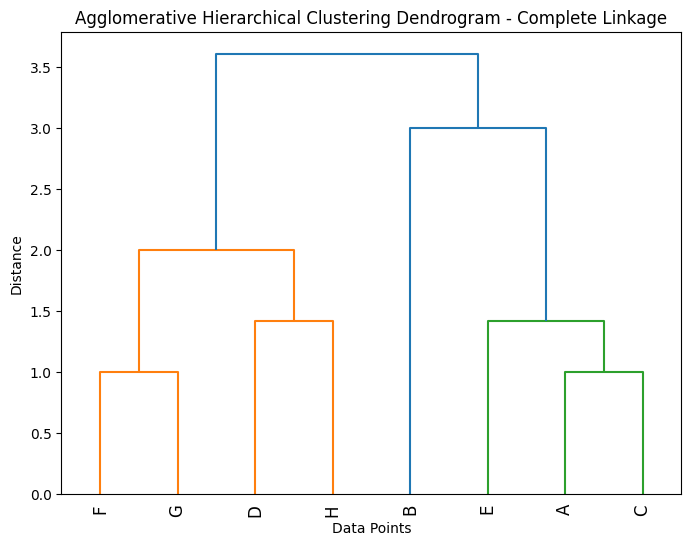

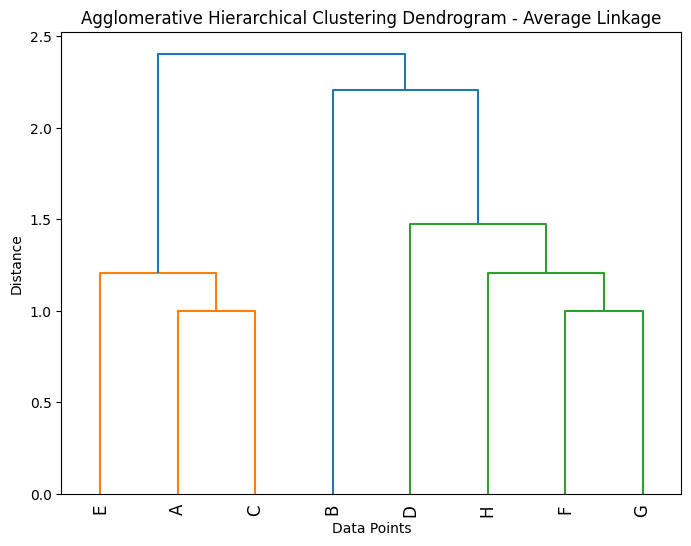

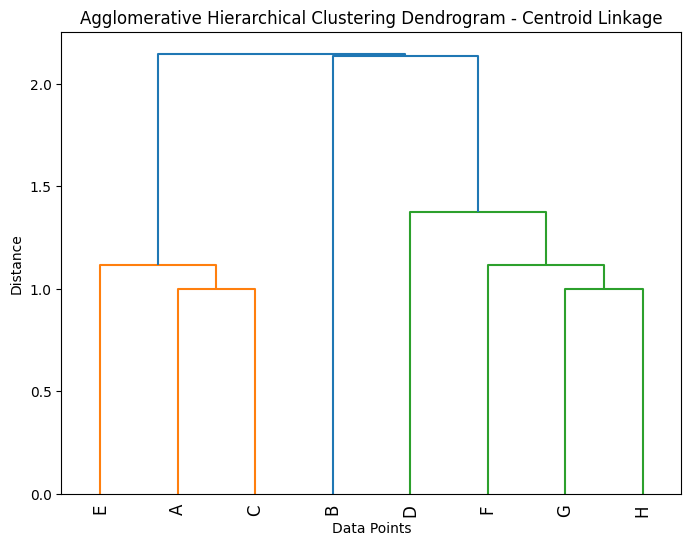

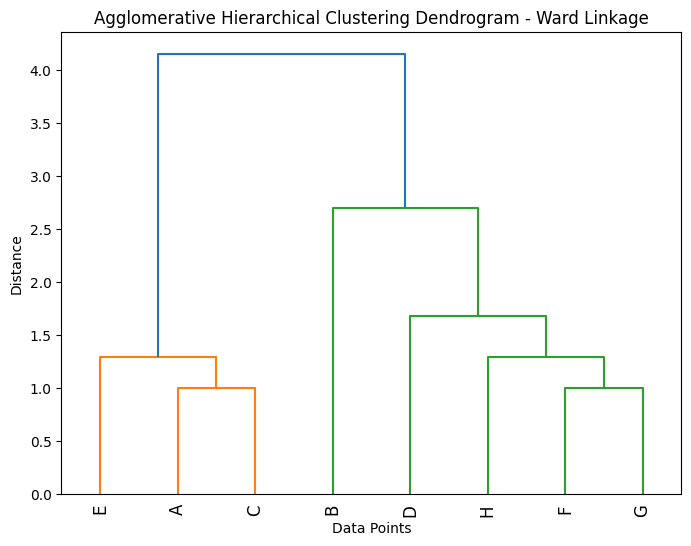

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample data
data = np.array([[1, 2], [1, 4], [2, 2], [4, 3], [1, 1], [2, 3], [3, 3], [3, 4]])

# Create a function to plot dendrograms
def plot_dendrogram(linkage_matrix, method_name):
    plt.figure(figsize=(8, 6))
    dendrogram(linkage_matrix, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], leaf_rotation=90)
    plt.title(f"Agglomerative Hierarchical Clustering Dendrogram - {method_name} Linkage")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# Single Linkage
linkage_complete = linkage(data, method='single')
plot_dendrogram(linkage_complete, 'Single')

# Complete Linkage
linkage_complete = linkage(data, method='complete')
plot_dendrogram(linkage_complete, 'Complete')

# Average Linkage
linkage_average = linkage(data, method='average')
plot_dendrogram(linkage_average, 'Average')

# Centroid Linkage
linkage_centroid = linkage(data, method='centroid')
plot_dendrogram(linkage_centroid, 'Centroid')

# Ward's Linkage
linkage_ward = linkage(data, method='ward')
plot_dendrogram(linkage_ward, 'Ward')


### Visualising Clusters

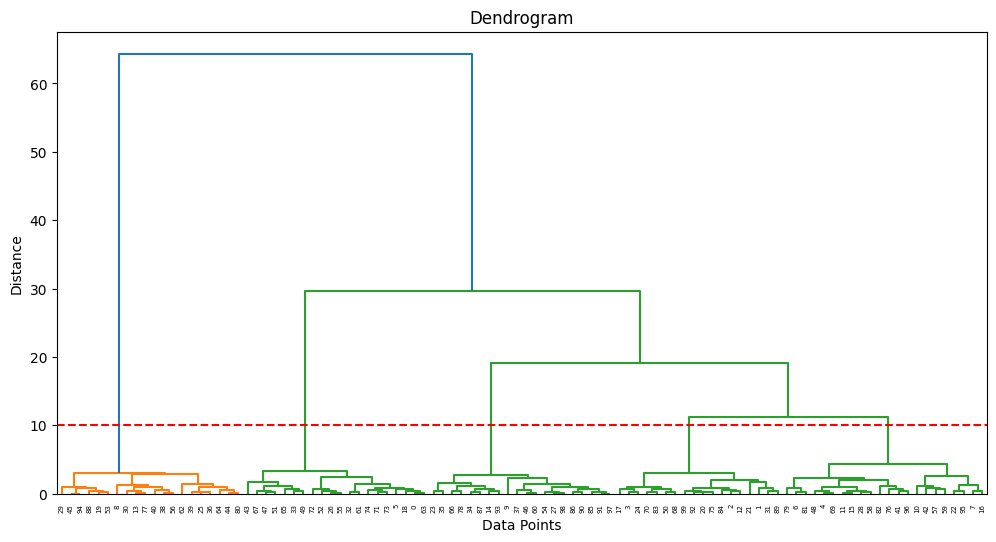

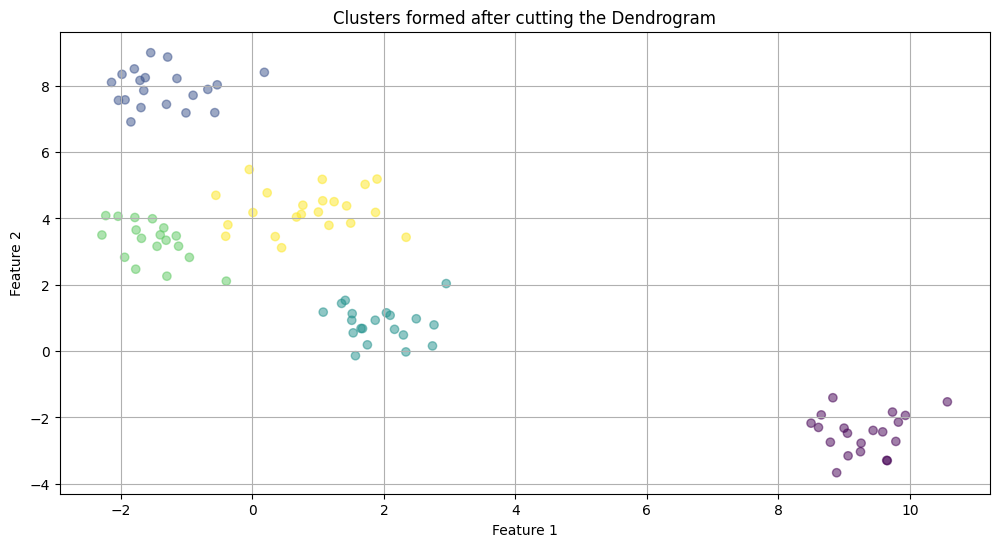

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 100
n_features = 2
n_clusters = 5
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering using Ward's method
Z = linkage(X, method='ward')

# Function to plot dendrogram
def plot_dendrogram(Z, cutoff=None):
    plt.figure(figsize=(12, 6))
    dendrogram(Z, leaf_rotation=90)
    if cutoff:
        plt.axhline(y=cutoff, color='r', linestyle='--')
    plt.title("Dendrogram")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# Plot the dendrogram
cutoff_height = 10  # You can adjust this height
plot_dendrogram(Z, cutoff=cutoff_height)

# Create clusters based on the cutoff
clusters = fcluster(Z, t=cutoff_height, criterion='distance')

# Visualizing the clusters
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("Clusters formed after cutting the Dendrogram")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
